In [1]:
from utils import *
import cv2
import matplotlib.pyplot as plt
import skimage
from skimage.filters import threshold_otsu as otsu

Using TensorFlow backend.


In [2]:
X, Y = load_dataset(f'data/train/', pad=14, return_idx=True, addcoords=True)

100%|██████████| 100/100 [00:02<00:00, 34.61it/s]


In [3]:
np.save('X_train.npy', X)

In [5]:
Xt = np.load('X_train.npy')

In [229]:
Xt.shape
counter = 0

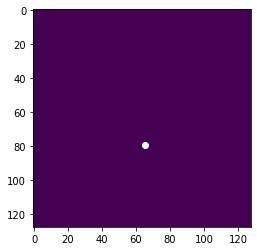

In [293]:
from skimage import measure
def get_center(y):
    mask = y == 2
    mask = measure.label(mask)

    plt.imshow(mask[:,:,o[2]])
        
    if mask.max() != 1:
        c1 = np.argwhere(mask == 1).mean(axis=0)
        c2 = np.argwhere(mask == 2).mean(axis=0)
        c = (c1 + c2) / 2
    else:
        c = np.argwhere(mask == 1).mean(axis=0)    
        c[1] = 64.14460244803878

    return c

for i in range(100):
    c = get_center(Y[i,:,:,:])
    
plt.scatter(c[1], c[0], color='w')


In [291]:
np.stack(centers).mean(axis=0)[1]

64.14460244803878

34 [78 54 51]


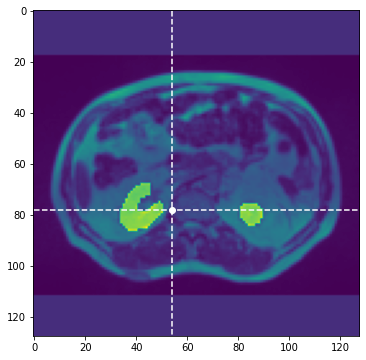

In [271]:
x = X[counter,:,:,:,1:]
img = X[counter,:,:,:,0]
y = Y[counter]
xx = np.sum(x * x, axis=-1)
counter += 1
# counter=25
o = np.argwhere(xx == xx.min())[0]
print(counter, o)
slc = img[:,:,o[2]] + 5 * (y[:,:,o[2]] == 2)
xc, yc = o[1], o[0]
plt.figure(figsize=(6, 6))
plt.imshow(slc)
plt.scatter(xc, yc, color='w')
plt.plot([xc, xc], [0, 127], '--', color='w')
plt.plot([0, 127], [yc, yc], '--', color='w')

In [208]:
counter

59

array([[78, 62, 51]])

In [209]:
slc = X[0,:,:,o[2],0] + 5 * (Y[0,:,:,o[2]] == 2)
lbl = Y[0,:,:,o[2]]
xc, yc = o[1], o[0]
plt.figure(figsize=(6, 6))
plt.imshow(slc)
plt.scatter(xc, yc, color='w')
plt.plot([xc, xc], [0, 127], '--', color='w')
plt.plot([left, left], [0, 127], '--', color='r')
plt.plot([0, 127], [yc, yc], '--', color='w')
plt.plot([0, 127], [back, back], '--', color='r')

plt.text(xc + 2, yc - 2, 'O (0, 0, 0)', color='w')
plt.text(xc + 2, back - 2, 'j (0, -1, 0)', color='w')
plt.text(left + 2, yc- 2, 'j (0, -1, 0)', color='w')

plt.show()

NameError: name 'left' is not defined

In [7]:
slc = np.transpose(X[0,:,o[1],:,0] + 5 * (Y[0,:,o[1],:] == 1))

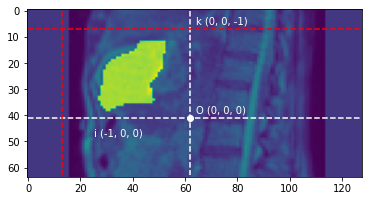

In [8]:
xc, yc = o[1], o[2]
plt.figure(figsize=(6, 6))
plt.imshow(slc)
plt.scatter(xc, yc, color='W')

plt.plot([xc, xc], [0, 63], '--', color='w')
plt.plot([0, 127], [yc, yc], '--', color='w')
plt.plot([0, 127], [top, top], '--', color='r')
plt.plot([left, left], [0, 63], '--', color='r')

plt.text(xc + 2, yc - 2, 'O (0, 0, 0)', color='w')
plt.text(xc + 2, top - 2, 'k (0, 0, -1)', color='w')

plt.text(25, yc + 7, 'i (-1, 0, 0)', color='w')

plt.show()

In [9]:
x = (np.arange(X.shape[1]) - o[0]) / (o[0] - back) 
y = (np.arange(X.shape[2]) - o[1]) / (o[1] - left)
z = (np.arange(X.shape[3]) - o[2]) / (o[2] - top)

In [10]:
xx = np.ones((128, 128, 64)) * x.reshape(128, 1, 1)
yy = np.ones((128, 128, 64)) * y.reshape(1, 128, 1)
zz = np.ones((128, 128, 64)) * z.reshape(1, 1, 64)

In [11]:
coords = np.stack([xx, yy, zz], axis=3)
coords.shape

(128, 128, 64, 3)

In [12]:
coords[0,45,0]

array([-1.51923077, -0.34693878, -1.20588235])

In [13]:
coords[0,2,45]

array([-1.51923077, -1.2244898 ,  0.11764706])